#**Predicting Crops Yield : A Machine Learning Approach**
## Crop yield prediction is an important agricultural problem.It is a regression problem.

The crops included in dataset are :

Cassava
Maize
Plantains and others
Potatoes
Rice, paddy
Sorghum
Soybeans
Sweet potatoes
Wheat
Yams


In the project, Machine Learning methods are applied to predict crop yield using publicly available data from FAO and World Data Bank.

Machine learning (ML) is used for **crop yield prediction** to improve the accuracy and flexibility of predictions compared to traditional methods. Here's why:

### Why Use ML for Crop Yield Prediction?

1. **Complex Relationships**:
   - Crop yield is influenced by a wide range of factors like **rainfall, temperature, pesticides, soil conditions**, and more. These relationships are often complex and non-linear. Machine learning algorithms like **Random Forest** and **Gradient Boosting** can model these non-linear relationships better than simple statistical analysis.

2. **Feature Interactions**:
   - In crop yield, certain features interact with each other (e.g., **rainfall might affect crop yield differently depending on temperature**). ML algorithms like **Decision Trees** can capture such interactions more effectively.

3. **Large Datasets**:
   - When working with a large dataset that includes multiple countries, crops, and factors like weather and pesticides, ML models can handle and process this massive amount of data efficiently, offering better scalability.

4. **Automated Feature Engineering**:
   - ML models like **Random Forest** can automatically handle feature importance and selection. For example, a **Decision Tree** will automatically find the most important factors (like **rainfall, temperature**) that impact crop yield, saving you from manually selecting the features.

5. **High Predictive Power**:
   - Traditional methods like simple statistical analysis may not be able to achieve the same predictive power as advanced ML algorithms. In your case, the **Decision Tree Regressor** achieved an accuracy of 96.04%, which might be challenging to match with simpler methods.

### Why Not Just Use Simple Analysis?

- **Simple statistical analysis** like linear regression may assume a linear relationship between features and crop yield. In the real world, however, the relationship is often much more complex. For example, the effect of rainfall on yield might not be the same across all regions or crops.
  
- ML models are **adaptive**. They can learn from more complex data patterns without needing prior knowledge of the relationships between variables, whereas traditional methods might miss those subtleties.

### ML in Your Project:

In your project, you used algorithms like:
- **Random Forest Regressor**: Aggregates many decision trees, making it robust and preventing overfitting.
- **Gradient Boosting Regressor**: Sequentially builds models to minimize errors, offering a highly accurate predictive model.
- **Decision Tree Regressor**: Provides visual and interpretable decision paths for each prediction.
- **Support Vector Regressor (SVM)**: Works well with high-dimensional data and can capture more complex patterns.

These algorithms make ML a powerful tool for improving crop yield predictions.

In [8]:
import pandas as pd
import numpy as np


yeild_df = pd.read_csv('/content/sample_data/yield_df.csv')
print(yeild_df.head())
yeild_df.info()
yeild_df.drop('Unnamed: 0',inplace=True,axis=1)
yeild_df.isnull().sum()
yeild_df.describe()
yeild_df.shape

yeild_df.dropna(inplace=True)
print(yeild_df.groupby('Item').count())

   Unnamed: 0     Area         Item  Year  hg/ha_yield  \
0           0  Albania        Maize  1990        36613   
1           1  Albania     Potatoes  1990        66667   
2           2  Albania  Rice, paddy  1990        23333   
3           3  Albania      Sorghum  1990        12500   
4           4  Albania     Soybeans  1990         7000   

   average_rain_fall_mm_per_year  pesticides_tonnes  avg_temp  
0                         1485.0              121.0     16.37  
1                         1485.0              121.0     16.37  
2                         1485.0              121.0     16.37  
3                         1485.0              121.0     16.37  
4                         1485.0              121.0     16.37  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Data columns (total 8 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Unnamed: 0                     282

In [9]:
yeild_df.describe()

,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
count,28242.000000,28242.000000,28242.00000,28242.000000,28242.000000
mean,2001.544296,77053.332094,1149.05598,37076.909344,20.542627
std,7.051905,84956.612897,709.81215,59958.784665,6.312051
min,1990.000000,50.000000,51.00000,0.040000,1.300000
25%,1995.000000,19919.250000,593.00000,1702.000000,16.702500
50%,2001.000000,38295.000000,1083.00000,17529.440000,21.510000
75%,2008.000000,104676.750000,1668.00000,48687.880000,26.000000
max,2013.000000,501412.000000,3240.00000,367778.000000,30.650000


It can be noticed the high variance in the values for each columns, later on I'll account for that will scaling.

In [10]:
yeild_df['Area'].nunique()


101

The dataframe has 101 Countries, ordering these by 20 the highest yield production:

In [11]:
yeild_df.groupby(['Area'],sort=True)['hg/ha_yield'].sum().nlargest(20)

,hg/ha_yield
Area,
India,327420324
Brazil,167550306
Mexico,130788528
Japan,124470912
Australia,109111062
Pakistan,73897434
Indonesia,69193506
United Kingdom,55419990
Turkey,52263950


In [12]:
yeild_df.groupby(['Item','Area'],sort=True)['hg/ha_yield'].sum().nlargest(20)

Item            Area          
Cassava         India             142810624
Potatoes        India              92122514
                Brazil             49602168
                United Kingdom     46705145
                Australia          45670386
Sweet potatoes  India              44439538
Potatoes        Japan              42918726
                Mexico             42053880
Sweet potatoes  Mexico             35808592
                Australia          35550294
Cassava         Brazil             33671231
Potatoes        Pakistan           32969754
Sweet potatoes  Japan              32794236
Potatoes        Turkey             30530955
Yams            Japan              29165394
Sweet potatoes  Brazil             28266502
Potatoes        South Africa       27341980
                Germany            26672181
Yams            Brazil             23472053
Sweet potatoes  Pakistan           21687615
Name: hg/ha_yield, dtype: int64

India is the highest for production of cassava and potatoes. Potatoes seems to be the dominated crop in the dataset, being the highest in 4 countries.

The final dataframe starts from 1990 and ends in 2013, that's 23 years worth of data for 101 countries.

Now, exploring the relationships between the colunms of the dataframe, a good way to quickly check correlations among columns is by visualizing the correlation matrix as a heatmap.

In [13]:
import sklearn
import seaborn as sns
import matplotlib.pyplot as plt


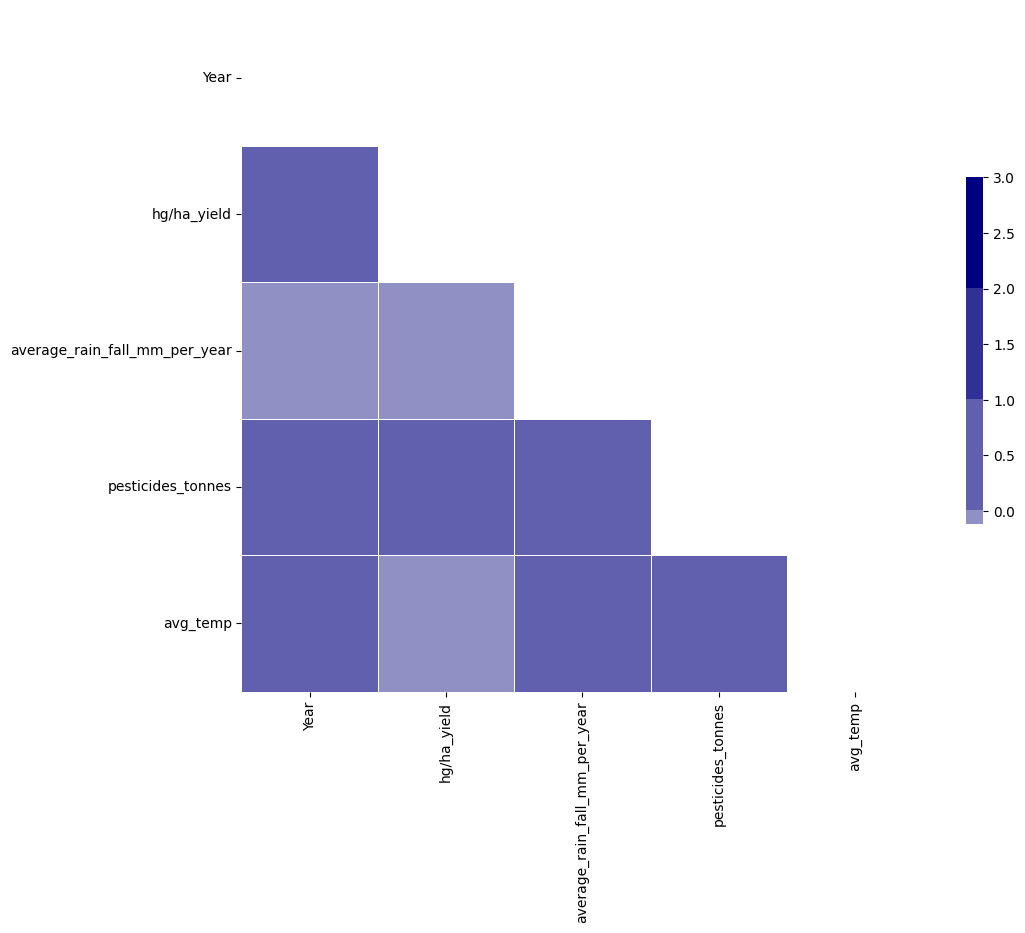

In [14]:
corr_data = yeild_df.select_dtypes(include=[np.number]).corr()

mask = np.zeros_like(corr_data, dtype=bool)
mask[np.triu_indices_from(mask)] = True
f,ax = plt.subplots(figsize=(11,9))

# Generate a custom diverging colormap
cmap = sns.light_palette("navy")

# to draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_data,mask=mask,cmap=cmap,vmax=3,center=0,
            square=True, linewidth=.5, cbar_kws={"shrink" : .5});

This code generates a heatmap of the **correlation matrix** with specific customizations using **seaborn** and **matplotlib**. Let's break down the different parts of the code and how each contributes to the final heatmap visualization:

### Code Breakdown:

1. **`corr_data = yield_df.select_dtypes(include=[np.number]).corr()`**
   - This computes the correlation matrix for all the numeric columns in the DataFrame `yield_df`. This matrix will later be visualized as a heatmap.

2. **`mask = np.zeros_like(corr_data, dtype=np.bool)`**
   - Creates an array of `False` values of the same shape as the correlation matrix. This will be used as a mask to hide parts of the heatmap (the upper triangle in this case).

3. **`mask[np.triu_indices_from(mask)] = True`**
   - Marks the upper triangle of the `mask` array as `True`, meaning that part of the heatmap will be hidden. This is done to avoid showing redundant information, as the correlation matrix is symmetric.

4. **`f, ax = plt.subplots(figsize=(11, 9))`**
   - Creates a figure (`f`) and a set of axes (`ax`) using `matplotlib`. The figure size is set to 11x9 inches for better readability of the heatmap.

5. **`cmap = sns.light_palette("navy")`**
   - This generates a custom color palette (colormap) using **navy** as the base color. The `light_palette()` function generates a series of lighter shades of the base color.

6. **`sns.heatmap(corr_data, mask=mask, cmap=cmap, vmax=.3, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})`**
   - **`corr_data`**: The correlation matrix is passed to the heatmap function.
   - **`mask=mask`**: Applies the mask to hide the upper triangle of the heatmap.
   - **`cmap=cmap`**: Uses the custom diverging colormap created with `sns.light_palette("navy")`.
   - **`vmax=.3`**: Limits the maximum value for the colormap. Values above 0.3 will be clipped, which can help emphasize smaller correlations.
   - **`center=0`**: The center of the colormap is set at `0`, ensuring that zero correlations are represented by a neutral color.
   - **`square=True`**: Forces the cells in the heatmap to be square-shaped, improving visual consistency.
   - **`linewidths=.5`**: Adds a small gap of 0.5 pixels between cells, making the grid clearer.
   - **`cbar_kws={"shrink": .5}`**: This shrinks the color bar by 50%, making it smaller and more proportionate to the heatmap.

### What This Heatmap Achieves:
- **Visualizes Correlations**: The heatmap provides an intuitive way to visualize the pairwise correlations between features in the dataset.
- **Hides Redundant Information**: By masking the upper triangle, the heatmap only shows the lower triangle of the correlation matrix, reducing redundancy.
- **Custom Colors**: The navy-blue color palette is used, with lighter shades representing weaker correlations and stronger shades representing stronger correlations.
- **Focuses on Specific Range**: The `vmax=0.3` argument clips high correlation values, ensuring that the heatmap emphasizes lower and more relevant correlation values, depending on the context of the analysis.

### Example Output:
The resulting heatmap will visually show correlations between features (e.g., crop yield, rainfall, pesticide usage), with lighter to darker navy shades indicating the strength and direction of the correlations.

This visualization helps you quickly identify:
- **Strong correlations** between features (important for feature selection).
- **Multicollinearity** if two independent variables are highly correlated.
- **Unimportant variables** (if a variable shows little correlation with the target, e.g., crop yield).

### Improvements and Customizations:
- **Change Color Palette**: You can experiment with different palettes by adjusting `sns.light_palette()` or using `sns.diverging_palette()` for diverging color maps.
- **Adjust `vmax` and `center`**: Tuning these parameters can help highlight specific ranges of correlation values.


# It can be seen from the above correlation map that there is no correlation between any of the columns in the dataframe.

In [15]:
yeild_df.head()

,Area,Item,Year,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,Albania,Maize,1990,36613,1485.0,121.0,16.37
1,Albania,Potatoes,1990,66667,1485.0,121.0,16.37
2,Albania,"Rice, paddy",1990,23333,1485.0,121.0,16.37
3,Albania,Sorghum,1990,12500,1485.0,121.0,16.37
4,Albania,Soybeans,1990,7000,1485.0,121.0,16.37


# Encoding Categorical Variables:

In [16]:
from sklearn.preprocessing import LabelEncoder

In [17]:
yeild_df_onehot = pd.get_dummies(yeild_df,columns=['Area','Item'],prefix = ['Country','Item'])
print(yeild_df_onehot.head())
features = yeild_df_onehot.loc[:,yeild_df_onehot.columns !='hg/ha_yield']
label = yeild_df['hg/ha_yield']
print(features.head())
print(label.head())

   Year  hg/ha_yield  average_rain_fall_mm_per_year  pesticides_tonnes  \
0  1990        36613                         1485.0              121.0   
1  1990        66667                         1485.0              121.0   
2  1990        23333                         1485.0              121.0   
3  1990        12500                         1485.0              121.0   
4  1990         7000                         1485.0              121.0   

   avg_temp  Country_Albania  Country_Algeria  Country_Angola  \
0     16.37             True            False           False   
1     16.37             True            False           False   
2     16.37             True            False           False   
3     16.37             True            False           False   
4     16.37             True            False           False   

   Country_Argentina  Country_Armenia  ...  Item_Cassava  Item_Maize  \
0              False            False  ...         False        True   
1              False

In [18]:
features = features.drop(['Year'], axis=1)
features.info()
print(features.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28242 entries, 0 to 28241
Columns: 114 entries, average_rain_fall_mm_per_year to Item_Yams
dtypes: bool(111), float64(3)
memory usage: 3.6 MB
   average_rain_fall_mm_per_year  pesticides_tonnes  avg_temp  \
0                         1485.0              121.0     16.37   
1                         1485.0              121.0     16.37   
2                         1485.0              121.0     16.37   
3                         1485.0              121.0     16.37   
4                         1485.0              121.0     16.37   

   Country_Albania  Country_Algeria  Country_Angola  Country_Argentina  \
0             True            False           False              False   
1             True            False           False              False   
2             True            False           False              False   
3             True            False           False              False   
4             True            False           F


# Scaling Features:

In [19]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
features = scaler.fit_transform(features)
print(features)

[[4.49670743e-01 3.28894097e-04 5.13458262e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [4.49670743e-01 3.28894097e-04 5.13458262e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [4.49670743e-01 3.28894097e-04 5.13458262e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 ...
 [1.90028222e-01 6.93361288e-03 6.28960818e-01 ... 0.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.90028222e-01 6.93361288e-03 6.28960818e-01 ... 1.00000000e+00
  0.00000000e+00 0.00000000e+00]
 [1.90028222e-01 6.93361288e-03 6.28960818e-01 ... 0.00000000e+00
  1.00000000e+00 0.00000000e+00]]


# **Training Data:**

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(features,label,test_size=0.2,random_state=4)


# **Model Comparison & Selection**
For this project, we'll compare between the following models :




*   Gradient Boosting Regressor
*   Random Forest Regressor
*   SVM
*   Decision Tree Regressor





In [21]:
from sklearn.metrics import r2_score
def compare_models(model):
    model_name = model.__class__.__name__
    fit = model.fit(x_train,y_train)
    y_pred = fit.predict(x_test)
    r2 = r2_score(y_test,y_pred)
    return([model_name,r2])

This function, `compare_models`, is designed to evaluate the performance of a machine learning model, particularly on the task of predicting crop yield in your project. Let's break it down step by step:



### **1. `model_name = model.__class__.__name__`**
- **What it does**: This line extracts the name of the model’s class (e.g., `RandomForestRegressor`, `GradientBoostingRegressor`, etc.).
- **Purpose**: This allows the function to keep track of which model it is evaluating. For example, if you pass a `RandomForestRegressor` model, `model_name` will store `"RandomForestRegressor"`. This is useful for comparison between multiple models.

### **2. `fit = model.fit(x_train, y_train)`**
- **What it does**: The model is trained (or "fit") using the **training data** (`x_train` and `y_train`), where:
  - `x_train`: This represents the features (inputs) for training (like rainfall, temperature, pesticides, etc.).
  - `y_train`: This represents the target variable, which in this case is the **crop yield** (e.g., `hg/ha_yield`).
- **Purpose**: This is the step where the model learns the relationship between the input features and the target crop yield.

### **3. `y_pred = fit.predict(x_test)`**
- **What it does**: After the model has been trained, it makes predictions on the **test data** (`x_test`), which is a separate set of input features that the model hasn’t seen before.
  - `x_test`: These are the input features from the test dataset (rainfall, temperature, etc.).
  - `y_pred`: This is the model's predicted crop yield for each row in `x_test`.
- **Purpose**: This step allows you to see how well the model generalizes to unseen data, giving you a sense of its real-world predictive power.

### **4. `r2 = r2_score(y_test, y_pred)`**
- **What it does**: The **R² score** (or coefficient of determination) is calculated between the true values (`y_test`) and the predicted values (`y_pred`).
  - `y_test`: The actual crop yield values from the test data.
  - `y_pred`: The predicted crop yield values from the model.
- **Purpose**: The R² score measures how well the predictions match the actual outcomes. It indicates the proportion of variance in the target variable (crop yield) that can be explained by the input features (rainfall, temperature, etc.). An R² score closer to 1 means better predictions, while a score closer to 0 indicates poor performance.

### **5. `return([model_name, r2])`**
- **What it does**: The function returns a list containing two elements:
  1. `model_name`: The name of the model class (e.g., `RandomForestRegressor`, `DecisionTreeRegressor`).
  2. `r2`: The R² score, which tells you how well the model performed on the test set.
- **Purpose**: This makes it easy to compare multiple models by their R² score and know which model performed better.

### **How This Helps in Your Crop Yield Prediction Project**
This function allows you to compare how different regression models (e.g., Random Forest, Gradient Boosting, Decision Tree, etc.) perform on the same crop yield prediction task. After training each model and evaluating it on the test set, the R² score tells you which model best predicts the crop yield based on features like **rainfall, temperature, and pesticide usage**.

#### Example:
- If you call this function with different models like `RandomForestRegressor()` or `DecisionTreeRegressor()`, it will return their respective R² scores:
  ```python
  rf_result = compare_models(RandomForestRegressor())
  dt_result = compare_models(DecisionTreeRegressor())
  ```
- The R² scores will help you decide which model performs best for predicting crop yields.

In [22]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn import svm
from sklearn.tree import DecisionTreeRegressor

models = [
    GradientBoostingRegressor(n_estimators=200, max_depth = 3,random_state = 0 ),
    RandomForestRegressor(n_estimators=200,max_depth=3,random_state=0),
    svm.SVR(gamma='auto'),
    DecisionTreeRegressor()
]



This code sets up a list of four different machine learning models that will be used for crop yield prediction. Each model belongs to a different algorithm type, and the parameters are specified to control how the models work. Let's break down each model and its parameters:

### 1. **GradientBoostingRegressor**

```python
GradientBoostingRegressor(n_estimators=200, max_depth=3, random_state=0)
```

- **Algorithm Type**: Gradient Boosting is an ensemble learning method that combines the predictions of multiple decision trees in a sequential manner. Each tree corrects the errors of the previous tree.
  
- **Parameters**:
  - **`n_estimators=200`**: This means the model will build **200 trees** sequentially. The more trees, the more complex and accurate the model can become, but it can also increase training time.
  - **`max_depth=3`**: This restricts the maximum depth of each tree to 3 levels. A shallower tree (smaller depth) prevents overfitting but might underfit.
  - **`random_state=0`**: Ensures reproducibility by setting the seed for random number generation.

- **Purpose**: This model will learn the relationship between the input features (rainfall, temperature, pesticide usage, etc.) and the crop yield by minimizing errors over several iterations.

---

### 2. **RandomForestRegressor**

```python
RandomForestRegressor(n_estimators=200, max_depth=3, random_state=0)
```

- **Algorithm Type**: Random Forest is an ensemble learning method that builds multiple decision trees independently (in parallel) and averages their predictions to improve accuracy and reduce overfitting.

- **Parameters**:
  - **`n_estimators=200`**: The number of decision trees in the forest. Having more trees increases stability but also computational complexity.
  - **`max_depth=3`**: Limits the depth of each tree to 3 levels to avoid overfitting.
  - **`random_state=0`**: Ensures consistent results when re-running the model.

- **Purpose**: This model will aggregate the predictions of multiple trees for a more stable and accurate crop yield prediction.

---

### 3. **Support Vector Regressor (SVR)**

```python
svm.SVR(gamma='auto')
```

- **Algorithm Type**: Support Vector Regression (SVR) is a regression model based on Support Vector Machines (SVM). It tries to fit a hyperplane within a certain margin that best predicts the target variable (crop yield).

- **Parameters**:
  - **`gamma='auto'`**: This controls how far the influence of a single training example reaches. In this case, `gamma='auto'` uses 1/n_features (number of features) as the default value for gamma, determining the influence of each point.

- **Purpose**: SVR is well-suited for capturing non-linear relationships in the dataset (e.g., complex dependencies between rainfall, temperature, and crop yield). However, it is sensitive to the feature scaling and requires proper tuning for large datasets.

---

### 4. **Decision Tree Regressor**

```python
DecisionTreeRegressor()
```

- **Algorithm Type**: Decision Tree Regressor builds a single decision tree that splits the dataset based on feature values to predict the target (crop yield).

- **Parameters**:
  - **No parameters explicitly set**: Here, the model uses default parameters, which might result in a fully grown tree (no limit on depth, which can lead to overfitting).

- **Purpose**: This is a simpler, more interpretable model. However, decision trees tend to overfit if no depth restrictions are applied.

---

### **How These Models Work Together**

You’ve created a list of four different models (`models`), each from a different algorithm type. These models can now be compared using the `compare_models` function you shared earlier. Each model will be trained on the same training data and evaluated based on its R² score to see which one performs best for crop yield prediction.

For example:

```python
for model in models:
    result = compare_models(model)
    print(result)
```

This will run each model through the `compare_models` function and print the model name along with its performance (R² score) on the test data.

### **Why Different Models Are Used**
- **Gradient Boosting** and **Random Forest** are both ensemble methods, but Gradient Boosting improves sequentially while Random Forest uses independent trees.
- **SVR** is good for capturing complex non-linear relationships, but it might not scale well for large datasets.
- **Decision Tree** is a simple model, easy to interpret but prone to overfitting. It can serve as a baseline.

Comparing these models allows you to identify which approach gives the best balance of accuracy and performance for your crop yield prediction task.

In [23]:
model_train = list(map(compare_models,models))

The line of code:

```python
model_train = list(map(compare_models, models))
```

is used to apply the `compare_models` function to each model in the `models` list and store the results in `model_train`.

Here’s a breakdown of how this line works:

### **1. `map(compare_models, models)`**
- **`map` function**: The `map()` function applies a given function (`compare_models` in this case) to every item in a list or iterable (`models` in this case).
  - **`compare_models`**: This is the function you defined earlier, which trains the model, makes predictions, calculates the R² score, and returns the model name and the R² score.
  - **`models`**: This is the list of models that you created (`GradientBoostingRegressor`, `RandomForestRegressor`, `SVR`, `DecisionTreeRegressor`).
  
- **What it does**: The `map()` function iterates over the `models` list, and for each model, it applies `compare_models(model)`. So, for every model in the list, the `compare_models` function will:
  1. Train the model on the training data.
  2. Predict the crop yield on the test data.
  3. Calculate the R² score.
  4. Return the model name and R² score as a list.

### **2. `list(map(compare_models, models))`**
- **Converts the result of `map` to a list**: The `map()` function returns an iterator (or "lazy" map object). By wrapping it in `list()`, you convert this into a list, so that you can store and access the results immediately.
  
### **3. `model_train`**
- **Stores the output**: The results of applying `compare_models` to all the models in `models` are stored in the variable `model_train`.
  - `model_train` will be a list of lists, where each inner list contains two elements:
    1. The name of the model.
    2. The R² score of that model.

### **Example Output**:
Let’s assume you have these models in your `models` list: `GradientBoostingRegressor`, `RandomForestRegressor`, `SVR`, and `DecisionTreeRegressor`. The result might look something like this:

```python
[['GradientBoostingRegressor', 0.85],
 ['RandomForestRegressor', 0.83],
 ['SVR', 0.60],
 ['DecisionTreeRegressor', 0.78]]
```

### **How It Helps in Your Crop Yield Prediction Project**:
- This single line of code evaluates all the models in the list efficiently.
- It provides a quick comparison between the different regression models based on the R² score, so you can easily determine which model is performing best for predicting crop yield based on your features like rainfall, temperature, and pesticide use.
  
After running this, you can simply inspect `model_train` to see which model performed the best.

In [24]:
print(*model_train,sep = "\n")

['GradientBoostingRegressor', 0.8963259512674945]
['RandomForestRegressor', 0.679853645519567]
['SVR', -0.21553813895075247]
['DecisionTreeRegressor', 0.9667020395602147]


The evaluation metric is based on **R^2 (coefficient of determination)** regression score function, that will represents the proportion of the variance for items (crops) in the regression model.**R^2** score shows how well terms (data points) fit a curve or line.

**R^2** is a statistical measure between 0 and 1 which calculates how similar a regression line is to the data it’s fitted to. If it’s a 1, the model 100% predicts the data variance; if it’s a 0, the model predicts none of the variance. I will calculate the adjusted **R^2 (coefficient of determination)**.R-squared is a modified version of R-squared that has been adjusted for the number of predictors in the model. The adjusted R-squared increases only if the new term improves the model more than would be expected by chance. It decreases when a predictor improves the model by less than expected by chance.

In [27]:
yeild_df_onehot = yeild_df_onehot.drop(['Year'], axis=1)


In [28]:
yeild_df_onehot.head()

,hg/ha_yield,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Country_Albania,Country_Algeria,Country_Angola,Country_Argentina,Country_Armenia,Country_Australia,...,Item_Cassava,Item_Maize,Item_Plantains and others,Item_Potatoes,"Item_Rice, paddy",Item_Sorghum,Item_Soybeans,Item_Sweet potatoes,Item_Wheat,Item_Yams
0,36613,1485.0,121.0,16.37,True,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
1,66667,1485.0,121.0,16.37,True,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,False
2,23333,1485.0,121.0,16.37,True,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
3,12500,1485.0,121.0,16.37,True,False,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
4,7000,1485.0,121.0,16.37,True,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False


In [29]:
# setting test data to columns from dataframe and excluding 'hg/ha_yeild' values where ml model be predicting
test_df=pd.DataFrame(x_test,columns=yeild_df_onehot.loc[:, yeild_df_onehot.columns != 'hg/ha_yield'].columns)

# using stack function to return a reshaped DataFrame by pivoting the columns of the current dataframe
cntry=test_df[[col for col in test_df.columns if 'Country' in col]].stack()[test_df[[col for col in test_df.columns if 'Country' in col]].stack()>0]
cntrylist=list(pd.DataFrame(cntry).index.get_level_values(1))
countries=[i.split("_")[1] for i in cntrylist]
itm=test_df[[col for col in test_df.columns if 'Item' in col]].stack()[test_df[[col for col in test_df.columns if 'Item' in col]].stack()>0]
itmlist=list(pd.DataFrame(itm).index.get_level_values(1))
items=[i.split("_")[1] for i in itmlist]

The given code snippet appears to set up test data for the model's prediction in the **crop yield prediction project**, specifically aiming to handle the one-hot encoded **countries** and **items** (crops) for the test set (`x_test`). Here's a detailed explanation of each part:

### 1. **Setting up the Test Data for Prediction**

```python
test_df = pd.DataFrame(x_test, columns=yeild_df_onehot.loc[:, yeild_df_onehot.columns != 'hg/ha_yield'].columns)
```

- **What this does**:
  - The test data (`x_test`) is turned into a `DataFrame`, with the same columns as the original data (`yeild_df_onehot`), except for the target variable (`hg/ha_yield`).
  - `yeild_df_onehot.loc[:, yeild_df_onehot.columns != 'hg/ha_yield'].columns` fetches all column names except for the target (which you want to predict).

- **Why it's done**:
  - This step ensures that the test data is structured similarly to the training data, with all features properly aligned. Since the machine learning model will be making predictions on this data, it's important that the columns match those used during training.

### 2. **Extracting Country Information from One-Hot Encoded Columns**

```python
cntry = test_df[[col for col in test_df.columns if 'Country' in col]].stack()[test_df[[col for col in test_df.columns if 'Country' in col]].stack() > 0]
```

- **What this does**:
  - **`[col for col in test_df.columns if 'Country' in col]`**: This selects all columns from `test_df` that correspond to countries (since these columns were created via one-hot encoding).
  - **`.stack()`**: This reshapes the `DataFrame` by stacking the one-hot encoded country columns. It transforms the wide-form columns (one column for each country) into a long-form, where each row represents a single value for the country.
  - **`.stack() > 0`**: Filters the stacked DataFrame, only keeping the rows where the value is greater than 0 (i.e., `True` values for the one-hot encoding, which represent the countries in each row).
  - **`cntry`**: This now holds the countries for each row in the test set where the country column is `1` (or `True`).

- **Why it's done**:
  - In a one-hot encoded format, the country information is spread across multiple columns. This step gathers that information back into a more usable format, identifying which country each row in the test set corresponds to.

### 3. **Getting Country List**

```python
cntrylist = list(pd.DataFrame(cntry).index.get_level_values(1))
countries = [i.split("_")[1] for i in cntrylist]
```

- **What this does**:
  - **`pd.DataFrame(cntry).index.get_level_values(1)`**: Extracts the second level of the index (the column names) from the stacked DataFrame. This gives you a list of the country column names for each row.
  - **`[i.split("_")[1] for i in cntrylist]`**: Splits each country column name by the underscore (e.g., `Country_Albania` becomes `['Country', 'Albania']`) and extracts the actual country name (e.g., `Albania`).

- **Why it's done**:
  - This converts the one-hot encoded country information back into a human-readable list of country names. For each row in the test set, you now know which country it corresponds to.

### 4. **Extracting Item (Crop) Information from One-Hot Encoded Columns**

```python
itm = test_df[[col for col in test_df.columns if 'Item' in col]].stack()[test_df[[col for col in test_df.columns if 'Item' in col]].stack() > 0]
```

- **What this does**:
  - Similar to how the country information was extracted, this code handles the crop (or "Item") information.
  - **`[col for col in test_df.columns if 'Item' in col]`**: This selects all columns related to crop items (e.g., `Item_Maize`, `Item_Potatoes`).
  - **`.stack()`**: Stacks the one-hot encoded columns.
  - **`.stack() > 0`**: Filters to keep only the rows where the value is greater than `0` (or `True`), representing the specific crop for each row.

- **Why it's done**:
  - Since the crop items are one-hot encoded, this step consolidates that information, making it easier to identify which crop each row in the test set corresponds to.

### 5. **Getting Item (Crop) List**

```python
itmlist = list(pd.DataFrame(itm).index.get_level_values(1))
items = [i.split("_")[1] for i in itmlist]
```

- **What this does**:
  - **`pd.DataFrame(itm).index.get_level_values(1)`**: Extracts the second level of the index (the column names) for crop items from the stacked DataFrame.
  - **`[i.split("_")[1] for i in itmlist]`**: Splits the column names (e.g., `Item_Maize` becomes `['Item', 'Maize']`) and extracts the crop name (e.g., `Maize`).

- **Why it's done**:
  - This step creates a list of crop names that correspond to each row in the test set. Now, you know which crop (e.g., Maize, Potatoes, etc.) is associated with each row of the test data.

---

### **Summary of What This Code Does**
- The code is working with the test data (`x_test`) to extract the **country** and **crop** (item) information that was one-hot encoded during preprocessing.
- The goal is to create lists of country names (`countries`) and crop names (`items`) for each row in the test set, which can then be used to interpret the predictions made by the machine learning models.
- By using `.stack()`, the one-hot encoded columns are transformed back into a more understandable format, allowing the identification of the country and crop associated with each data point in the test set.

### **Why This Matters for Model Prediction**
When the model makes predictions (i.e., predicts the crop yield), you need to know the **context** for each prediction—i.e., which **country** and **crop** that prediction corresponds to. This code helps you extract that context from the one-hot encoded features, making the predictions more interpretable and useful in real-world applications.

In [30]:

test_df.head()

,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Country_Albania,Country_Algeria,Country_Angola,Country_Argentina,Country_Armenia,Country_Australia,Country_Austria,...,Item_Cassava,Item_Maize,Item_Plantains and others,Item_Potatoes,"Item_Rice, paddy",Item_Sorghum,Item_Soybeans,Item_Sweet potatoes,Item_Wheat,Item_Yams
0,0.529006,0.008521,0.545486,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1,0.507056,0.214084,0.480409,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
2,0.138915,0.016812,0.871210,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.536218,0.938137,0.784327,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.048918,0.001920,0.628279,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [31]:
test_df.drop([col for col in test_df.columns if 'Item' in col],axis=1,inplace=True)
test_df.drop([col for col in test_df.columns if 'Country' in col],axis=1,inplace=True)
test_df.head()

,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp
0,0.529006,0.008521,0.545486
1,0.507056,0.214084,0.480409
2,0.138915,0.016812,0.871210
3,0.536218,0.938137,0.784327
4,0.048918,0.001920,0.628279


In [32]:
test_df['Country']=countries
test_df['Item']=items
test_df.head()

,average_rain_fall_mm_per_year,pesticides_tonnes,avg_temp,Country,Item
0,0.529006,0.008521,0.545486,Peru,Sweet potatoes
1,0.507056,0.214084,0.480409,Japan,Wheat
2,0.138915,0.016812,0.871210,Pakistan,Potatoes
3,0.536218,0.938137,0.784327,Brazil,Sorghum
4,0.048918,0.001920,0.628279,Tunisia,Sorghum


In [33]:
clf=DecisionTreeRegressor()
model=clf.fit(x_train,y_train)

test_df["yield_predicted"]= model.predict(x_test)
test_df["yield_actual"]=pd.DataFrame(y_test)["hg/ha_yield"].tolist()
test_group=test_df.groupby("Item")
test_group.apply(lambda x: r2_score(x.yield_actual,x.yield_predicted))

,0
Item,
Cassava,0.930399
Maize,0.899483
Plantains and others,0.832473
Potatoes,0.913435
"Rice, paddy",0.907787
Sorghum,0.783900
Soybeans,0.845929
Sweet potatoes,0.883172
Wheat,0.946742


 following steps for a crop yield prediction task using a `DecisionTreeRegressor`. Here's a breakdown:

1. **Model Training**:
   ```python
   clf = DecisionTreeRegressor()
   model = clf.fit(x_train, y_train)
   ```
   This initializes a `DecisionTreeRegressor` and fits it to the training data (`x_train` and `y_train`).

2. **Making Predictions**:
   ```python
   test_df["yield_predicted"] = model.predict(x_test)
   ```
   Here, the model predicts the yields for the test dataset (`x_test`) and stores the results in a new column in `test_df`.

3. **Storing Actual Yields**:
   ```python
   test_df["yield_actual"] = pd.DataFrame(y_test)["hg/ha_yield"].tolist()
   ```
   This creates a new column for the actual yields using the values from `y_test`.

4. **Grouping and Evaluating**:
   ```python
   test_group = test_df.groupby("Item")
   test_group.apply(lambda x: r2_score(x.yield_actual, x.yield_predicted))
   ```
   Finally, the code groups the test data by the "Item" column and applies the `r2_score` function to calculate the R² score for each group, which indicates the model's performance.



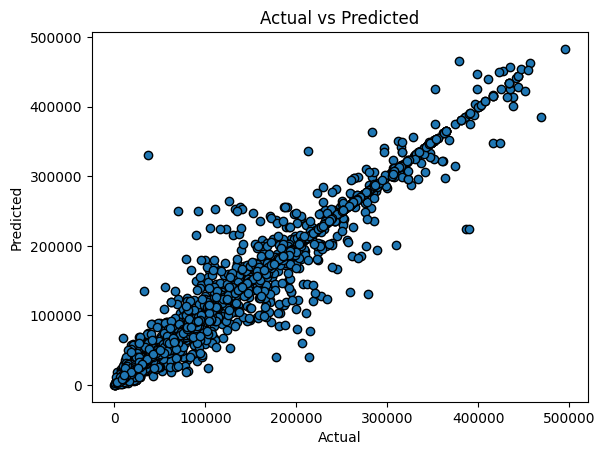

In [34]:
# So let's run the model actual values against the predicted ones

fig, ax = plt.subplots()

ax.scatter(test_df["yield_actual"], test_df["yield_predicted"],edgecolors=(0, 0, 0))

ax.set_xlabel('Actual')
ax.set_ylabel('Predicted')
ax.set_title("Actual vs Predicted")
plt.show()

It can be seen that R Square score is excellent. This means that we have found a good fitting model to predict the crops yield value for a certain country. Adding more features, like climate data; wind and pollution, the economical situation of a given country and so on will probably enhance the model’s predictions.

In [35]:
def adjusted_r_squared(y,yhat,x):
    score=1- (((1-(r2_score(y,yhat)))*(len(y)-1))/(len(y)-x.shape[1]-2))
    return score

test_group.apply(lambda x: adjusted_r_squared(x.yield_actual,x.yield_predicted,x))

,0
Item,
Cassava,0.928982
Maize,0.898468
Plantains and others,0.822002
Potatoes,0.912645
"Rice, paddy",0.906630
Sorghum,0.781161
Soybeans,0.843994
Sweet potatoes,0.881435
Wheat,0.946180


# **Model Results & Conclusions**

In [36]:
varimp= {'importances':model.feature_importances_,'names':yeild_df_onehot.columns[yeild_df_onehot.columns!="hg/ha_yield"]}

creating a dictionary to store the feature importances of the `DecisionTreeRegressor` model along with the corresponding feature names. Here’s a breakdown:

1. **Feature Importances**:
   ```python
   model.feature_importances_
   ```
   This retrieves the importance scores for each feature used in the model. These scores indicate how much each feature contributes to the model's predictions.

2. **Feature Names**:
   ```python
   yeild_df_onehot.columns[yeild_df_onehot.columns != "hg/ha_yield"]
   ```
   This selects the column names from `yeild_df_onehot`, excluding the target variable "hg/ha_yield".

3. **Creating the Dictionary**:
   ```python
   varimp = {
       'importances': model.feature_importances_,
       'names': yeild_df_onehot.columns[yeild_df_onehot.columns != "hg/ha_yield"]
   }
   ```



<ipython-input-37-3b87af8195ea>:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="importances",y="names",palette="vlag",data=df,orient="h",ax=ax);


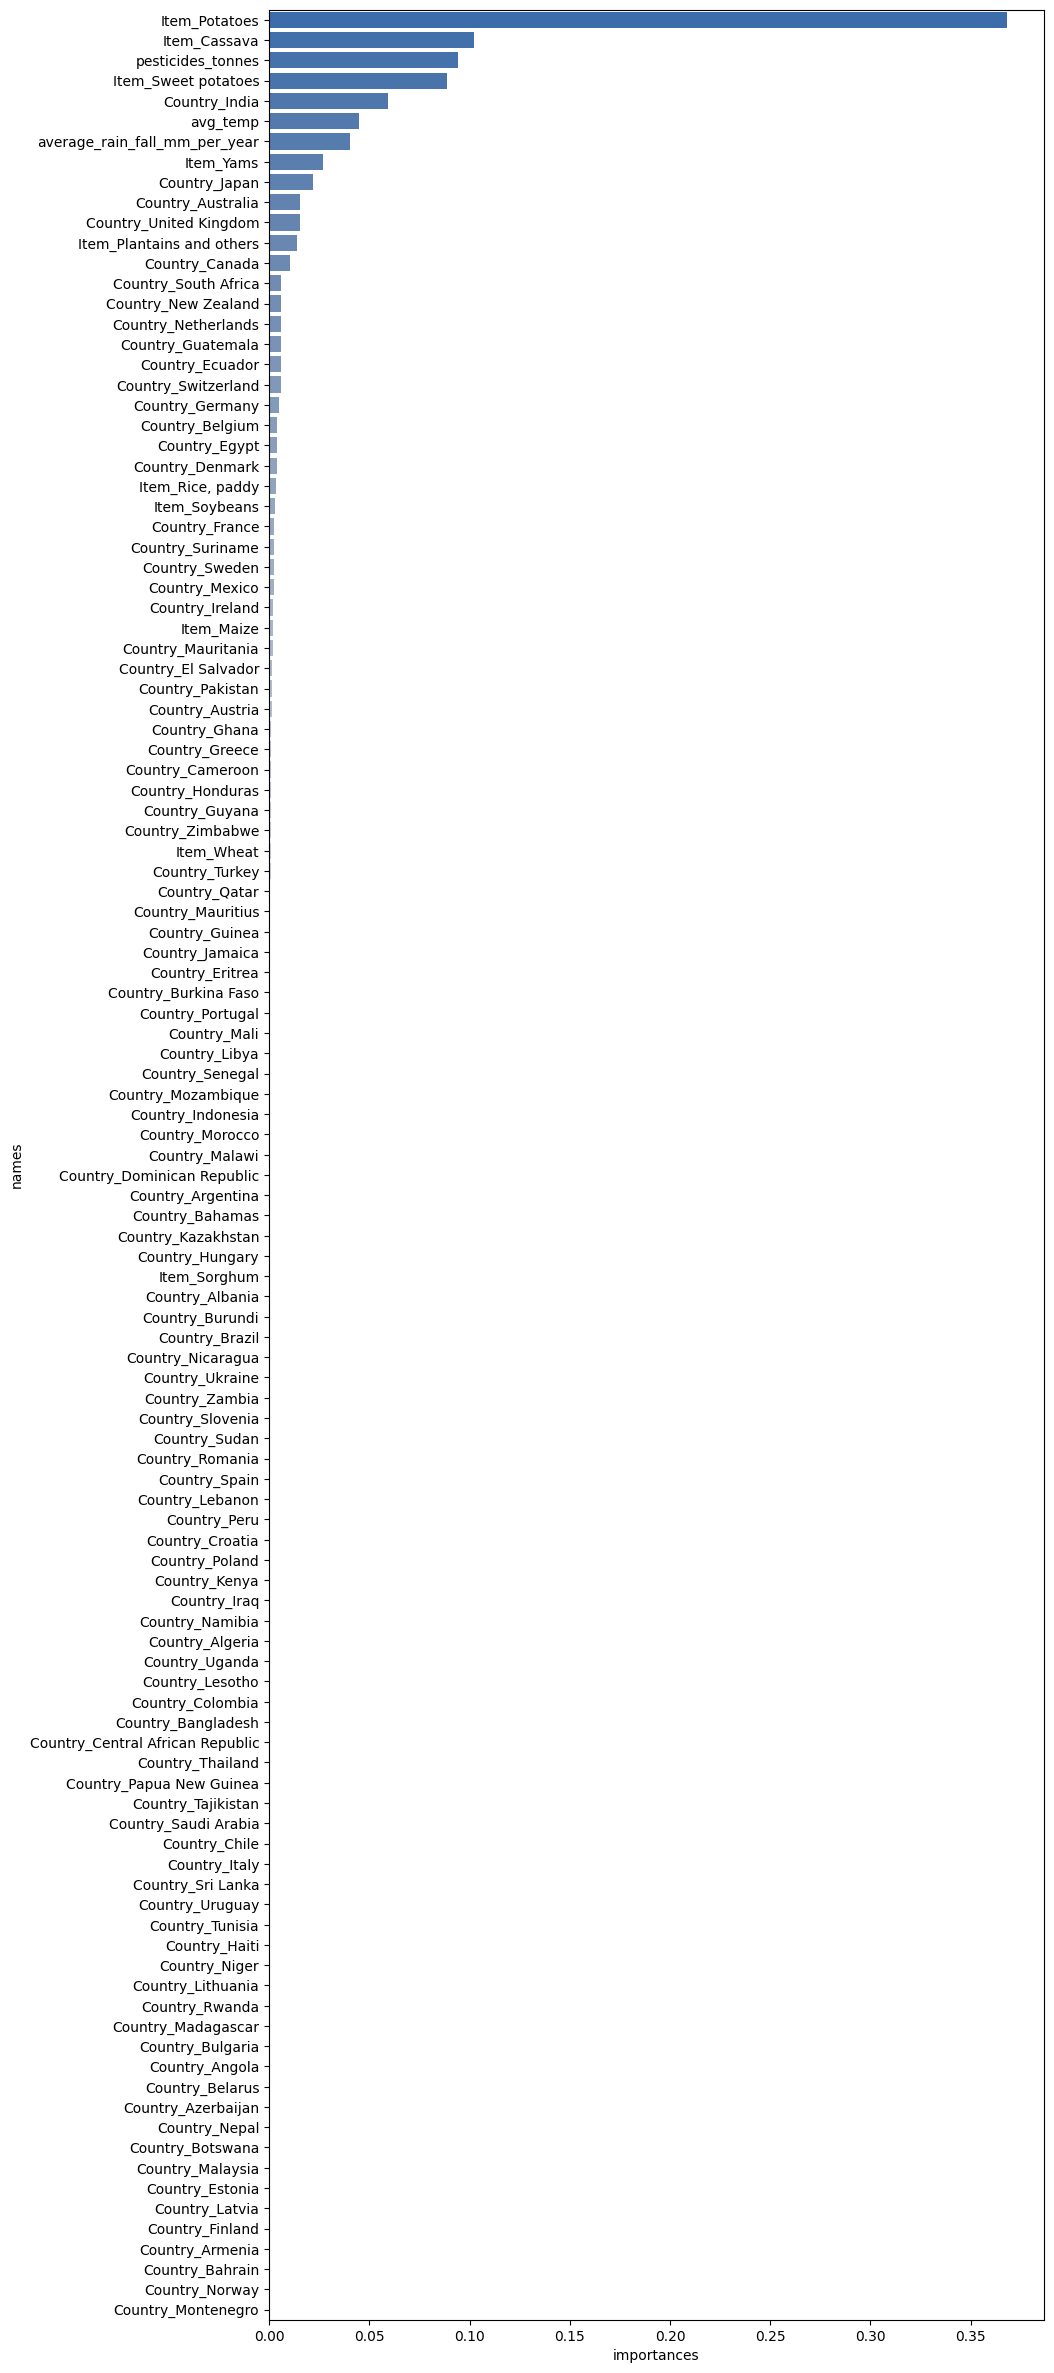

In [37]:
a4_dims = (10,30)

fig, ax = plt.subplots(figsize=a4_dims)
df=pd.DataFrame.from_dict(varimp)
df.sort_values(ascending=False,by=["importances"],inplace=True)
df=df.dropna()
sns.barplot(x="importances",y="names",palette="vlag",data=df,orient="h",ax=ax);

Your code snippet is set up to create a horizontal bar plot of feature importances using `seaborn`. Here’s a breakdown of each part and some suggestions for improvement:

1. **Figure Dimensions**:
   ```python
   a4_dims = (10, 30)
   fig, ax = plt.subplots(figsize=a4_dims)
   ```
   This initializes a figure with specified dimensions suitable for displaying a horizontal bar plot.

2. **Creating DataFrame from Dictionary**:
   ```python
   df = pd.DataFrame.from_dict(varimp)
   ```
   This creates a DataFrame from the `varimp` dictionary you created earlier, which contains the feature importances and their names.

3. **Sorting Values**:
   ```python
   df.sort_values(ascending=False, by=["importances"], inplace=True)
   df = df.dropna()
   ```
   This sorts the DataFrame by importances in descending order and drops any rows with NaN values.

4. **Plotting with Seaborn**:
   ```python
   sns.barplot(x="importances", y="names", palette="vlag", data=df, orient="h", ax=ax);
   ```

### Suggestions
- Make sure you have imported the necessary libraries:
  ```python
  import matplotlib.pyplot as plt
  import seaborn as sns
  import pandas as pd
  ```

- **Setting the Palette**: Ensure that the `palette` you selected (`"vlag"`) fits your visualization needs. You could also choose other palettes like `"viridis"` or `"coolwarm"` for different color schemes.

- **Displaying the Plot**: To display the plot, you might want to add:
  ```python
  plt.title('Feature Importances')
  plt.xlabel('Importance Score')
  plt.ylabel('Feature Names')
  plt.show()
  ```

- **Handling Large Data**: If you have many features, consider adjusting the figure size or the font size for better readability.



Getting only top 7 of features importance in the model:

<ipython-input-38-f07bf187ec5a>:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="importances",y="names",palette="vlag",data=df,orient="h",ax=ax);


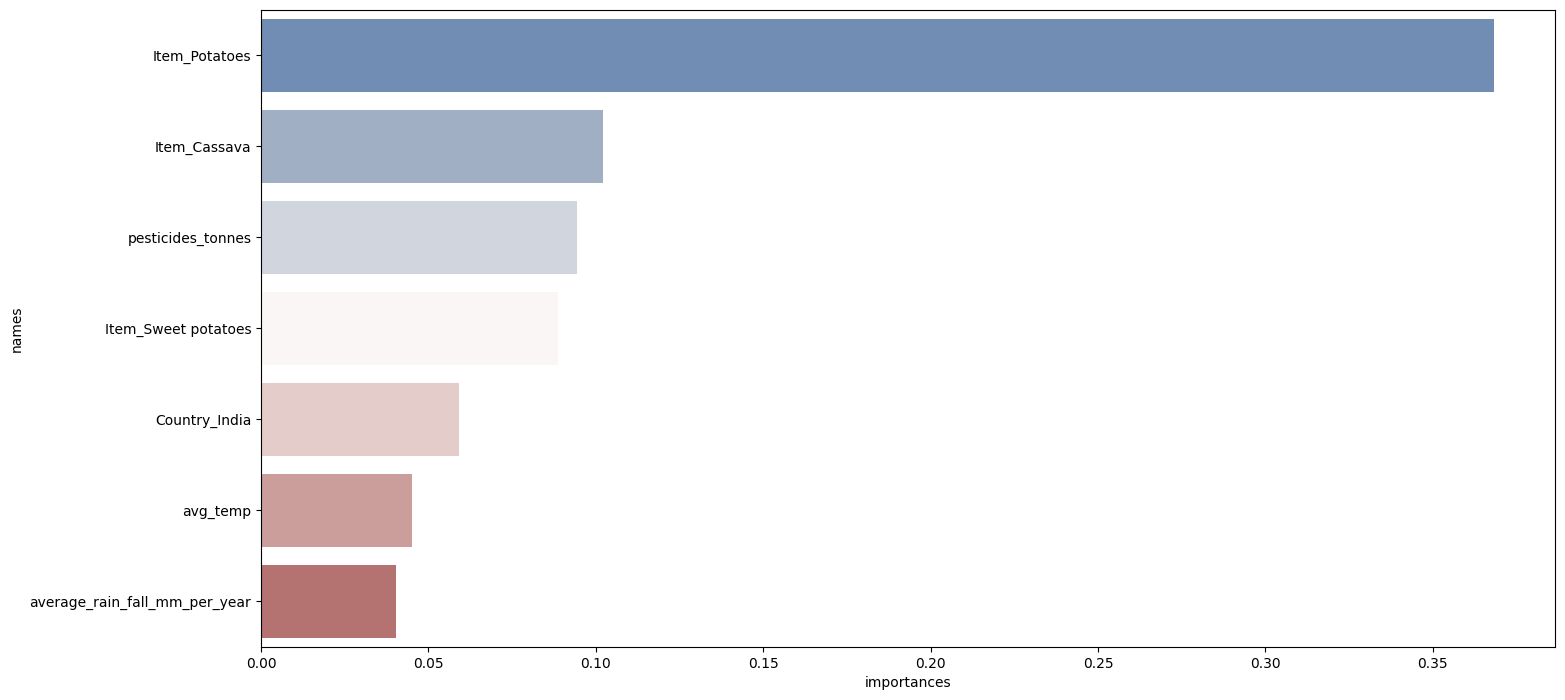

In [38]:
#7 most important factors that affect crops
a4_dims = (16.7, 8.27)

fig, ax = plt.subplots(figsize=a4_dims)
df=pd.DataFrame.from_dict(varimp)
df.sort_values(ascending=False,by=["importances"],inplace=True)
df=df.dropna()
df=df.nlargest(7, 'importances')
sns.barplot(x="importances",y="names",palette="vlag",data=df,orient="h",ax=ax);

The crop being potatoes has the highest importance in the decision making for the model, where it's the highest crops in the dataset. Cassava too, then as expected we see the effect of pesticides, where its the third most important feature, and then if the crop is sweet potatoes, we see some of the highest crops in features importance in dataset.

If the crop is grown in India, makes sense since India has the largest crops sum in the dataset. Then comes rainfall and temperature. Thr first assumption about these features were correct, where they all significantly impact the expected crops yield in the model.

This code snippet visualizes the **top 7 most important factors** that affect crop yield in your machine learning model. Let’s break it down step by step:

### 1. **Setting the Figure Size**

```python
a4_dims = (16.7, 8.27)
fig, ax = plt.subplots(figsize=a4_dims)
```

- **What this does**:
  - Sets the size of the figure that will display the barplot. The dimensions are given in inches to create a wide, landscape-oriented figure.
  
- **Why it’s done**:
  - This ensures that the plot has enough space to display the labels and bars clearly without crowding, especially if there are longer names or values.

### 2. **Converting the Variable Importance Data to a DataFrame**

```python
df = pd.DataFrame.from_dict(varimp)
```

- **What this does**:
  - `varimp` is likely a dictionary that contains the feature importances (in this case, the importance of factors affecting crop yield). This line converts it into a `DataFrame` so it can be manipulated and visualized more easily.

- **Why it’s done**:
  - Working with a `DataFrame` makes it easier to sort, filter, and plot the data, which are the next steps in the code.

### 3. **Sorting and Cleaning the Data**

```python
df.sort_values(ascending=False, by=["importances"], inplace=True)
df = df.dropna()
df = df.nlargest(7, 'importances')
```

- **What this does**:
  - **Sorting**: The `sort_values()` function sorts the DataFrame in descending order based on the `importances` column, so that the most important features are at the top.
  - **Removing `NaN` values**: `df.dropna()` removes any rows with missing values to ensure clean data for plotting.
  - **Selecting Top 7**: The `nlargest(7, 'importances')` function selects the top 7 rows based on the `importances` column. These represent the 7 most important factors.

- **Why it’s done**:
  - You want to display the top 7 most important features and ensure the data is clean and sorted for visualization.

### 4. **Plotting the Bar Chart**

```python
sns.barplot(x="importances", y="names", palette="vlag", data=df, orient="h", ax=ax);
```

- **What this does**:
  - **`sns.barplot()`**: Creates a barplot using Seaborn. The `x="importances"` sets the feature importances on the x-axis, while `y="names"` sets the corresponding feature names on the y-axis.
  - **`palette="vlag"`**: Applies a color palette for the bars (you can adjust this to your preference).
  - **`orient="h"`**: Ensures the bars are horizontal, which makes it easier to read the feature names on the y-axis.
  - **`ax=ax`**: Plots the bar chart on the figure you initialized earlier.

- **Why it’s done**:
  - Bar plots are great for comparing the relative importance of different features. Horizontal bars are especially useful when you have longer names (like country or crop names).

### **Summary of What This Code Does:**

- It visualizes the **top 7 most important features** (factors) that influence crop yield in your prediction model. The importance of these features is calculated by the model, likely during the training process, and is stored in `varimp`.
- This kind of visualization helps you understand **which factors the model deems most significant**, making it easier to interpret the results and focus on key variables (like **rainfall, temperature, pesticide use**, etc.).

### **Why Feature Importance Matters:**
In your **crop yield prediction project**, knowing which factors are most important helps in:
1. **Improving Model Interpretability**: You can see why certain predictions are made by understanding which factors influence the outcome.
2. **Decision-Making**: Farmers, policymakers, and agricultural planners can focus on the most important factors (e.g., optimizing rainfall, managing pesticides) to increase yield.
3. **Feature Selection**: It helps you remove less important features to reduce the model's complexity while retaining accuracy.

This plot will give you a clear understanding of the **top contributors** to crop yield in your machine learning model.

<ipython-input-39-7fa74b186812>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x="Item",y="hg/ha_yield",palette="vlag",data=yeild_df,ax=ax);


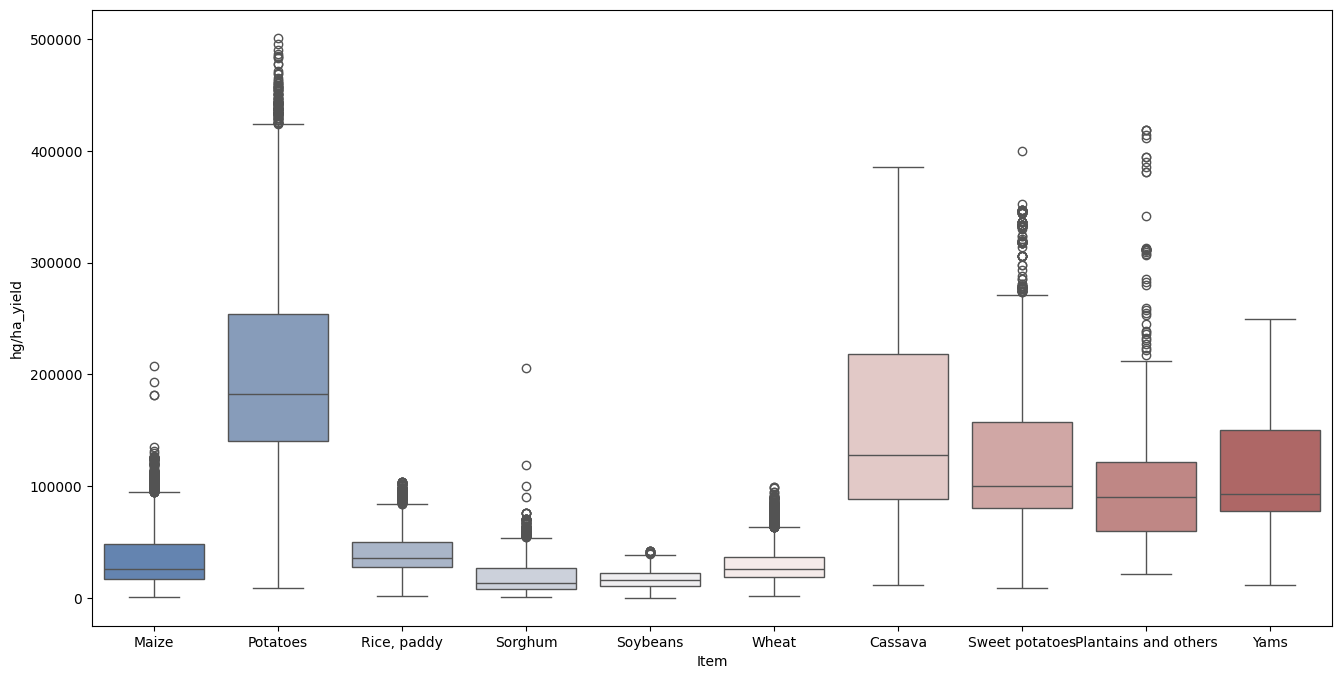

In [39]:
#Boxplot that shows yield for each item
a4_dims = (16, 8.)

fig, ax = plt.subplots(figsize=a4_dims)
sns.boxplot(x="Item",y="hg/ha_yield",palette="vlag",data=yeild_df,ax=ax);

GraphViz Library is used for graph generation of the Decision Tree Regressor.

In [40]:
pip install graphviz

In [41]:
import os
os.environ["PATH"] += os.pathsep + '/content/sample_data'

In [42]:
# Install six
!pip install six

#Import StringIO from six
from six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus
import collections
dot_data = export_graphviz(model, out_file=None, max_depth=5,
                                feature_names=yeild_df_onehot.columns[yeild_df_onehot.columns!="hg/ha_yield"])

# Draw graph
graph = pydotplus.graph_from_dot_data(dot_data)


# Show graph
graph.write_pdf("model_depth.pdf")

True

In [44]:
data_max=yeild_df_onehot.loc[:, yeild_df_onehot.columns != 'hg/ha_yield'].max()
data_min=yeild_df_onehot.loc[:, yeild_df_onehot.columns != 'hg/ha_yield'].min()
#saving the model using pickle
import pickle
filename = 'yield_model.sav'
pickle.dump(model, open(filename, 'wb'))

pickle.dump(data_max, open('max.data', 'wb'))
pickle.dump(data_min, open('min.data', 'wb'))

In [46]:
import pickle

# Load the model from the file
with open('/content/yield_model.sav', 'rb') as file:
    loaded_model = pickle.load(file)

# Make predictions with the loaded model
predictions = loaded_model.predict(x_test)

print(predictions)

[171233.  31797. 104452. ...   8602.  61563.  14042.]
